In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stats
from sklearn.neighbors import KNeighborsClassifier

data = pd.read_csv('weight-height.csv')

df = pd.DataFrame(data)


In [65]:
# Convert to metric system
df['Height'] = df['Height'] *  2.54
df['Weight'] = df['Weight'] / 2.205

df.head(2)

,Gender,Height,Weight
0,Male,187.571423,109.702296
1,Male,174.706036,73.610192


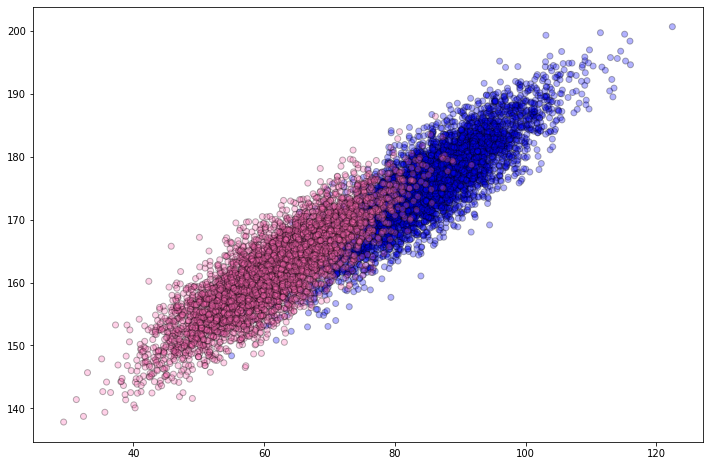

In [66]:
X, y, g = df.Weight , df.Height, df.Gender

colors = {'Male':'blue', 'Female':'hotpink'}
plt.figure(figsize= (12, 8))
plt.scatter(X, y, c=g.map(colors), alpha= 0.3,  edgecolor='k')
plt.show()

In [67]:
# Classify data to '1' & '0' for Male and Female accordigly
df = df.replace(['Male', 'Female'], [1, 0])
df.head(2)

,Gender,Height,Weight
0,1,187.571423,109.702296
1,1,174.706036,73.610192


In [68]:
# Create X_train from Transpose array 'Weight'&'Height' and Y_train from array 'Gender'
X_train = np.array([df['Weight'],df['Height']]).T[:8000]

y_train = np.array(df['Gender'])[:8000]
print(X_train[:2], '\n\n', y_train[:2])
print(X_train.shape, y_train.shape)

X_test = np.array([df['Weight'],df['Height']]).T[-100:]
y_test = np.array(df['Gender'])[-100:]

[[109.70229623 187.57142322]
 [ 73.61019162 174.70603628]] 

 [1 1]
(8000, 2) (8000,)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=12)

In [69]:
class KNN:
    
    def __init__(self, k=3):
        self.k = k
        
    # train
    def fit(self, X_train, y_train, X_test):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
    
    
    # Prediction
    def predict(self, X):
        predicted_labels = [self._predict(x) for x in X]
        return np.array(predicted_labels)
    
    def euclidean_distance(self, a, b):
        dist = np.sqrt(np.sum((a-b) ** 2))
        return dist
    
    def _predict(self, x):
        
        # compute distances
        distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
        
        # get k nearest samples, labels
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        
        # Majority vote, most common class label
        most_common = stats.mode(k_nearest_labels)
        return most_common
    
    # Cal accuracy
    def evaluate(self):
        y_predict_test = [self._predict(x) for x in self.X_test]
        y_predict_test = np.array(y_predict_test)
        return np.sum(y_predict_test == y_test) / len(y_test)
    

In [84]:
clf = KNN(k=19)


clf.fit(X_train, y_train, X_test)

X_sample = np.array([[100, 40],[120,50],[80,70],[90,65],[100,80]])


predictions = clf.predict(X_sample)

predictions = pd.Series(predictions)
Gen = {1:'Male', 0:'Female'}
for num, Gender in predictions.map(Gen).items():
    print(Gender, end = ' _ ')

print()
accu = clf.evaluate()
print('The accuracy of our KNN is :' , accu)

Female _ Male _ Female _ Female _ Male _ 
The accuracy of our KNN is : 0.89


In [ ]:
neigh = KNeighborsClassifier(n_neighbors=19)
neigh.fit(X_train, y_train)
SKlear_Accu = neigh.score(X_test, y_test)
print(SK)